<a href="https://colab.research.google.com/github/DianaShramchenko/works/blob/main/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

### 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [6]:
# импортируем нужное
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image
from urllib.request import urlopen

# импорт модели NasNetLarge
model = keras.applications.NASNetLarge(
    input_shape=None,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
# Вывод краткого описания архитектуры созданной модели
model.summary()

359748576/359748576 [==============================] - 4s 0us/step
Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 331, 331, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 165, 165, 96)         2592      ['input_1[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 165, 165, 96)         384       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation (Activation)  

### 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

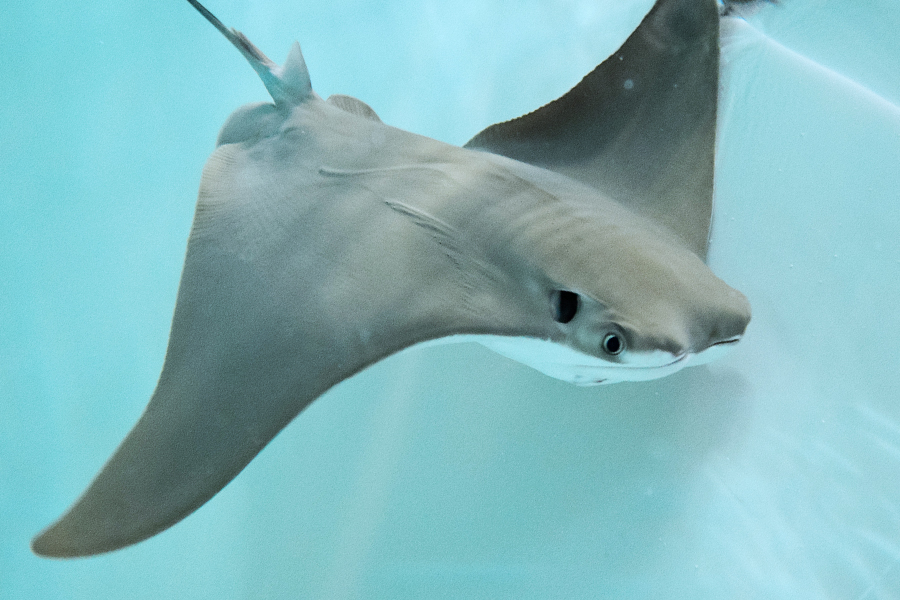

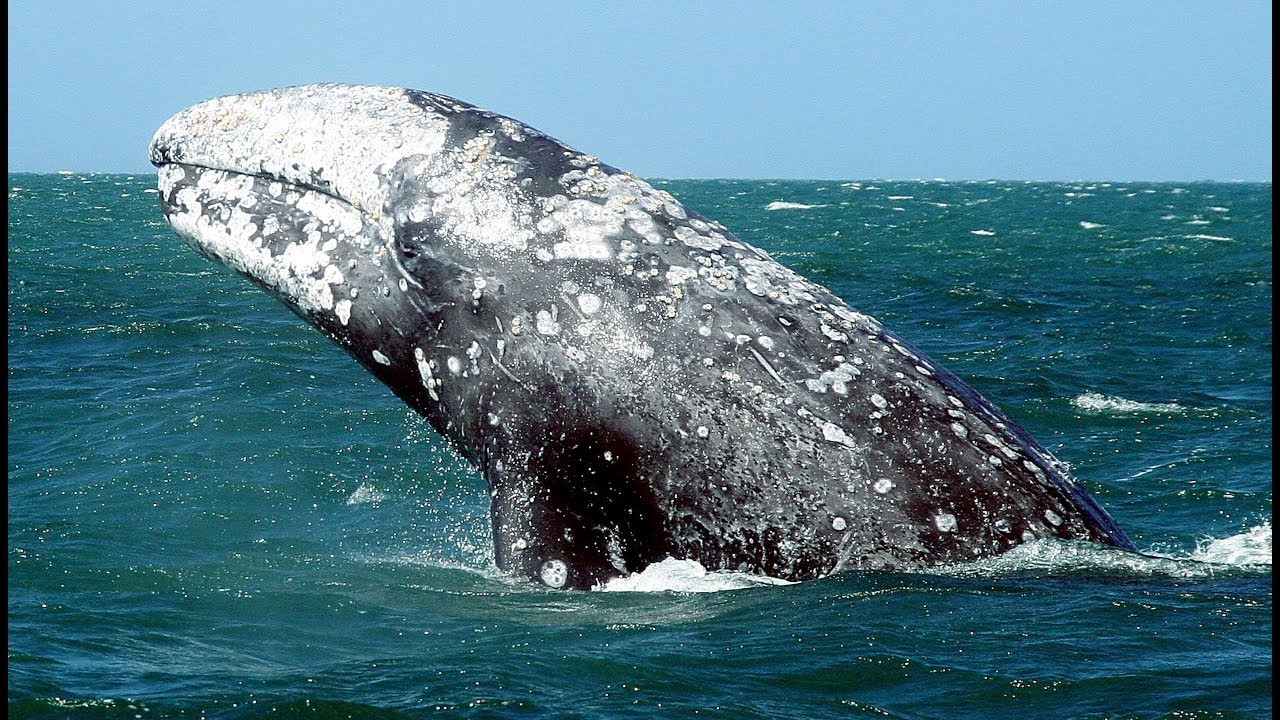

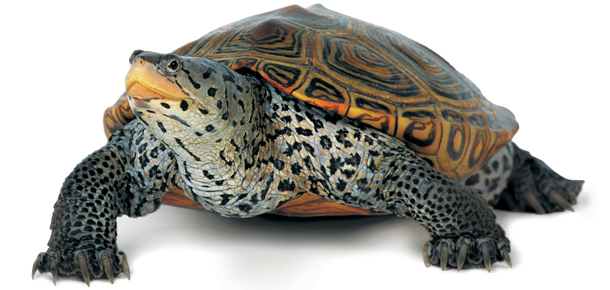

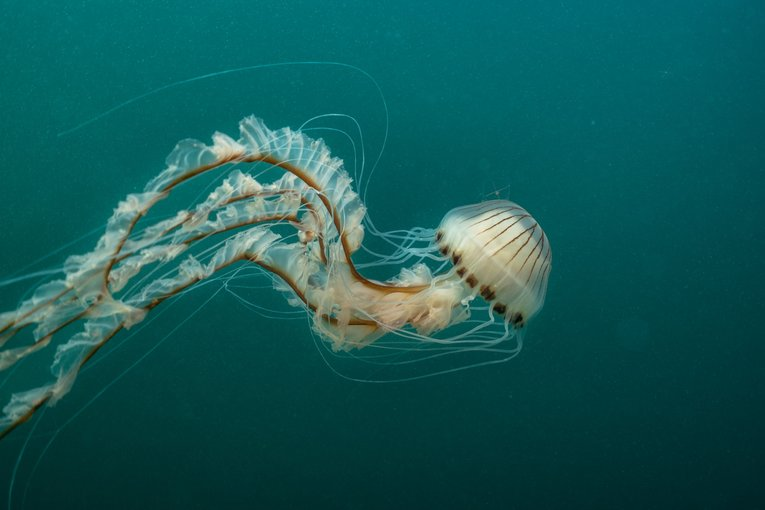

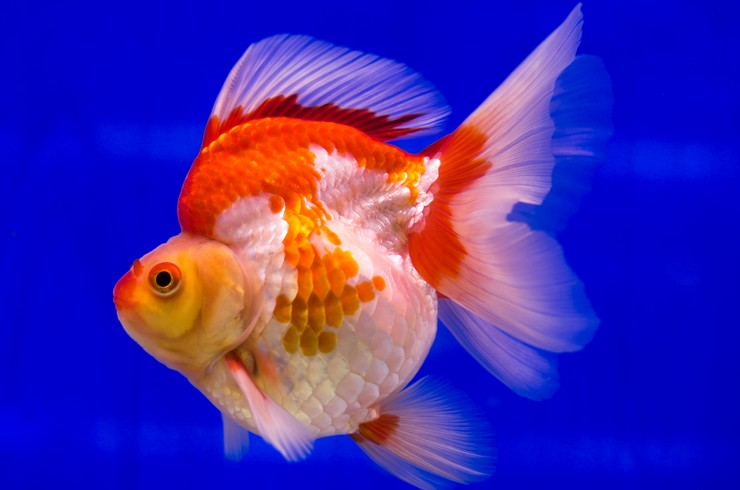

In [10]:
from google.colab.patches import cv2_imshow
#from urllib.request import urlopen
# картинки и ссылки
# используя метод urlopen, получаем объект запроса по ссылке (изображение)
# и сохраняем его в виде потокового набора данных в переменную "req"
# 1-скат, 2-серый кит, 3-черепаха, 4-медуза, 5-золотая рыбка
req_1 = urlopen('https://www.moskvarium.ru/upload/iblock/fff/900kh600.jpg')
req_2 = urlopen('https://i.ytimg.com/vi/THB78mk9lBU/maxresdefault.jpg')
req_3 = urlopen('https://www.mdsg.umd.edu/sites/default/files/images/terrapin_no_backgroud.jpg')
req_4 = urlopen('https://s3.eu-west-1.amazonaws.com/media.mcsuk.org/images/RS31885_image-131-lpr.width-765.jpg')
req_5 = urlopen('https://blog.tetra.net/ru/ru/wp-content/uploads/2021/02/riukin-korotkotelaya-poroda-zolotyh-rybok.jpg')

reqs = [req_1, req_2,req_3, req_4, req_5]
images = []
for req in reqs:                                                                                      # и сохраняем его в виде потокового набора данных в переменную "req"
  image = np.asarray(bytearray(req.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
  image = cv2.imdecode(image, -1)
  images.append(image) # декодируем изображение в привычный для отображения формат
  cv2_imshow(image) # Выводим изображение, используя метод cv2_imshow()


### 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС (нормализация).

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [46]:
def normalize(images, shape):
# Создание независимой копии исходного списка изображений
    proc_images = images.copy()

    # Преобразование каждого изображения
    for i in range(len(proc_images)):
        # Применение предварительной обработки изображения для модели NasNetLarge
        proc_images[i] = preprocess_input(np.array(proc_images[i]).reshape(shape))

    return proc_images

In [47]:

from keras.applications.nasnet import preprocess_input
import numpy as np

processed_images = []

for img in images:
    # Преобразование каждого изображения в формат, подходящий для модели NasNetLarge
    processed_img = preprocess_input(np.expand_dims(img, axis=0))
    processed_images.append(processed_img)

for img in processed_images:
    print(img.shape)

(1, 600, 900, 3)
(1, 720, 1280, 3)
(1, 290, 610, 3)
(1, 510, 765, 3)
(1, 490, 740, 3)


### 1.5. Выведите изображения и соответствующие им классы (как в примере из теории)

In [49]:
for input_image in processed_images:
    # Преобразование изображения в формат, подходящий для модели NasNetLarge
    input_image = preprocess_input(np.expand_dims(input_image, axis=0))

    # Предсказание класса объекта
    res = model.predict(input_image)

    # Вывод номера класса объекта
    print(np.argmax(res))

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "NASNet" is incompatible with the layer: expected shape=(None, 331, 331, 3), found shape=(None, 1, 600, 900, 3)


# Задание 2. Использование обученной модели для работы со своим датасетом

### 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
# Ваш код

### 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [ ]:
# Ваш код

### 2.3. Обучение своей модели на основе предобученной модели "*название модели, выбранной в п.2.1.*"

In [ ]:
# Ваш код

### 2.4. Визуализация процесса обучения модели

In [ ]:
# Ваш код

### 2.5. Подготовьте набор проверочных данных (examples)

In [ ]:
# Ваш код

### 2.6. Реализуйте графический интерфейс для взаимодействия с обученной моделью, используя [Gradio](https://www.gradio.app/guides/image-classification-in-tensorflow). В качестве примеров (параметр examples в Gradio), используйте изображения из списка images (п.1.2.)

In [ ]:
# Ваш код

# Задание 3. Классификация набора пространственных данных EuroSat (для магистров)

- Ссылка на датасет: https://github.com/phelber/eurosat

- Описание на kaggle: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

В этом задании Вам будет предоставлен набор данных EuroSat, который содержит снимки земной поверхности, снятые спутником Sentinel-2. Вам нужно будет обучить модель для классификации этих изображений на 10 классов, представляющих различные типы земного покрова.

### **3.1. Загрузка данных:**
  * [Скачайте](https://madm.dfki.de/files/sentinel/EuroSAT.zip) набор данных EuroSat
  * Разделите данные на обучающую, валидационную и тестовую выборки.



In [ ]:
# Ваш код

### **3.2. Выбор архитектуры нейронной сети:**
  * Выберите архитектуру нейронной сети, основанную на трансферном обучении, например, ResNet50, VGG16 или InceptionV3 ([полный список](https://keras.io/api/applications/)).
  * Загрузите предобученную модель выбранной архитектуры.


In [ ]:
# Ваш код

### **3.3. Дообучение модели:**
  * Добавьте к предобученной модели несколько слоев для классификации изображений EuroSat.
  * Обучите модель на обучающей выборке.

In [ ]:
# Ваш код



### **3.4. Оценка модели:**
  * Оцените производительность модели на валидационной и тестовой выборках.
  * Сравните результаты с другими архитектурами нейронных сетей.



In [ ]:
# Ваш код

### **3.5. Анализ результатов:**
  * Проанализируйте влияние различных параметров на производительность модели, таких как:
      * Количество эпох обучения
      * Размер пакета
      * Функция активации
      * Оптимизатор
      * Регуляризация

-----------------------------------------
**Ваш вывод**
-----------------------------------------
